In [1]:
AUG_PATH = r"E:\data\eddy_dataset_augment\eddy_aug"
IMG_PATH = r"E:\data\eddy_dataset_augment\eddy_img"
JSON_PATH = r"E:\data\eddy_dataset_augment\eddy_json"

In [2]:
import imageio
import imgaug as ia
import numpy as np
from imgaug.augmentables.polys import Polygon, PolygonsOnImage
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBoxesOnImage
%matplotlib inline

C:\Users\WTY\AppData\Local\Temp/ipykernel_2992/2344628218.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(IMG_PATH, img_list[0]))


(554, 594, 3)


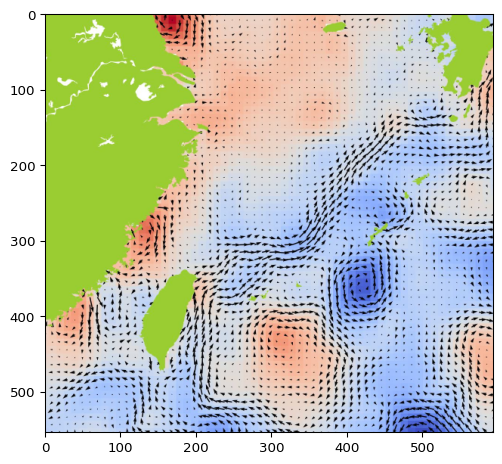

In [8]:
## 获取图片名列表
import os

img_list = os.listdir(IMG_PATH)

## 读取图片
## 选取其中的一张
image = imageio.imread(os.path.join(IMG_PATH, img_list[0]))
# image = ia.imresize_single_image(image, 0.5) # 会resize图片
# imgaug没有图像读取的功能

ia.imshow(image)

In [ ]:
## 读取图片对应的json文件
import json

json_name = img_list[0].split('.')[0] + ".json"
json_file = os.path.join(JSON_PATH, json_name)
with open(json_file, "r") as js:
    json_dict = json.load(js)

## 将json文件中的类别和points读出 存入两个list中
# json文件 格式 字典shapes:["labels":"Cyclonic", "points":[402., 313.]]
shapes = json_dict["shapes"]
points_list = list()
for shape in shapes:
    points_dict = shape["points"]
    points = list()
    ## 处理单个points的list
    for point in points_dict:
        points.append((point[0], point[1]))
    points_list.append(points)

## 获取图片的shape
imageHeight = json_dict["imageHeight"]
imageWidth = json_dict["imageWidth"]

## 将points转存成Polygon
# 多个points如何转换
psoi = ia.PolygonsOnImage(points_list, shape=(imageHeight, imageWidth, 3))

## 扩充方法
aug = iaa.Sequential([
        iaa.
])
## 对Polygon进行扩充
image_aug, psoi_aug = aug(image=image, polygons=psoi)

## 将Polygon进行保存，只需要改变对应的points就可以
# 保存图片
imageio.imwrite("{}_aug.jpg".format(img_list[0]), image_aug)

# 保存json
## 修改json内容
json_dict[""]